# IPL 2008-2019 data to analyze key success factors for the top cricket teams.

# 1.Introduction

   The Indian Premier League (IPL)  is a men's Twenty20 (T20) cricket league that is annually held in India and contested by  city-based franchise teams. The BCCI founded the league in 2007. The competition is usually held between March and May every year, and has an exclusive window in the ICC Future Tours Programme; fewer international cricket tours take place during IPL seasons.



 Since IPL is already in full swing and every cricket freak is keeping a close watch whichever team they support on their smart devices, having some insights based on IPL matches data readily available is like gold especially for those who are busy selecting players for their team on dream11 to increase their chances of winning cash.



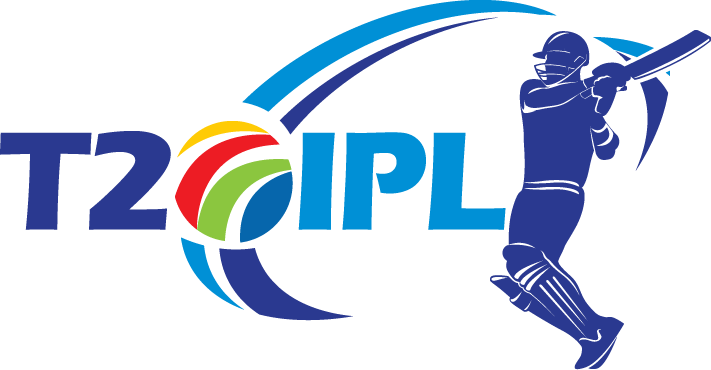

   The IPL is the most-popular cricket league in the world; in 2014, it was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event to be broadcast live on YouTube.A team can acquire players through either the annual player auction, trading players with other teams during trading windows, and signing replacements for unavailable players. Players sign up for the auction and set their own base price, and are bought by the highest-bidding franchise. Players unsold at the auction are eligible to be signed as replacement signings. In the trading windows, a player can only be traded with his consent; the franchise pays any difference between the old and new contracts. If the new contract is worth more than the old one, the difference is shared between the player and the selling franchise. Players cannot be traded outside the trading windows or during the tournament, whereas replacements can be signed before or during the tournament. The league has banned players from Pakistan since 2008, the previous and only time they appeared in the IPL.

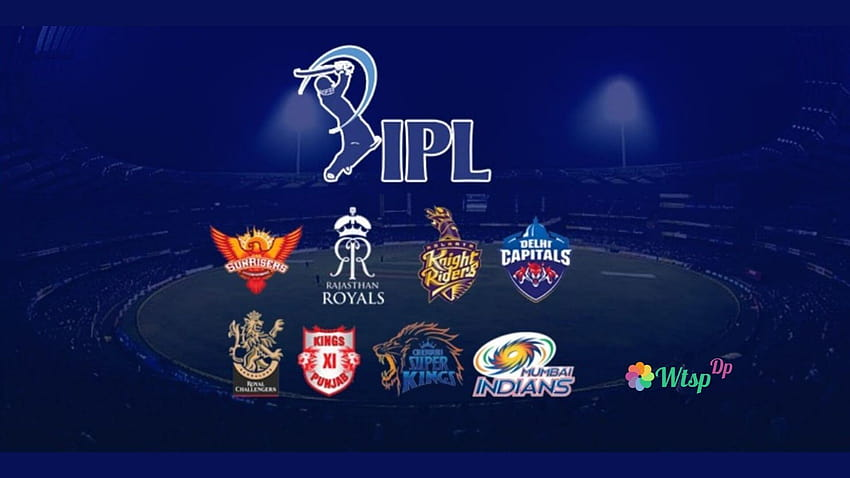

# 2. Problem Statement

  We will try to identify the team that has more chance to win the upcoming seasons by finding observations like success rate of each team, identify the team that has won maximum seasons, best defending and chasing team and analyse the toss decisions

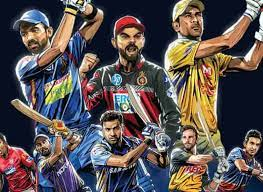

  In this analysis of IPL matches from 2009 to 2018 is done using python packages like pandas, matplotlib and seaborn. This Exploratory Data Analysis will help us to find patterns in data, determining relationships in data. We will try to identify the team that has more chance to win the upcoming seasons by finding observations like success rate of each team, identify the team that has won maximum seasons, best defending and chasing team and analyse the toss decisions etc.



# 3. Installing ,Upgrading & Importing Libraries

## 3.1 Upgrading  Libraries

In [50]:
import numpy as np
#--------------------------------------------------------------------------------------------------------------------------------

import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.float_format',lambda x:'%.5f' % x,)
#--------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#--------------------------------------------------------------------------------------------------------------------------------
import warnings 
warnings.filterwarnings('ignore')


# 4.Data Acquisition & Description

 The dataset consists of the information about IPL matches held from 2008 to 2019.
 
   The dataset comprises of 696 observations of 18 columns. Below is a table showing names of all the columns and their description.

In [51]:
data=pd.DataFrame(data=[['ID','Match ID'],['Season','IPL Season Year'],['City','City in which match held'],['Date','Date on which match held'],['Team_1','Team 1'],['Team 2','Team 2'],['Toss_winner','Team who won the toss'],
    
['Toss_decision','opted to field or bat'],['Result','Normal or Tie or DI applied'],['Winner','Team who won the match'],['Win by runs','Team won by how many runs'],['Win by wickets','Team won by how many wickets'],['Player Of Match','Player who won man of the match'],['Venue','Stadium where the match held'],['Umpire 1''Umpire1 Name',],['Umpire 2','Umpire2 Name'],['Umpire 3','Umpire3 Name']],index='1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 '.split(),columns=' ColumnaName   description'.split())

In [5]:
data

,ColumnaName,description
1,ID,Match ID
2,Season,IPL Season Year
3,City,City in which match held
4,Date,Date on which match held
5,Team_1,Team 1
6,Team 2,Team 2
7,Toss_winner,Team who won the toss
8,Toss_decision,opted to field or bat
9,Result,Normal or Tie or DI applied
10,Winner,Team who won the match


In [52]:
df_matches= pd.read_csv('C:\\shivani\\matches.csv')
print('shape of the dataset:',df_matches.shape)
df_matches.head()

shape of the dataset: (756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [53]:
df_matches1=pd.read_csv('C:\\shivani\\balldata.csv')

In [54]:
df_matches1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


## 4.1 **Data Information**

- In this section we will get **information about the data** and see some observation.

In [55]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [56]:
df_matches1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [57]:
df_matches1.shape


(193468, 18)

## 4.2 **Data Description**

- In this section we will get **Description of the data set** and get brief information about it.

In [58]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.00000,756.00000,756.00000,756.00000,756.00000
mean,1792.17857,2013.44444,0.02513,13.28307,3.35053
std,3464.47815,3.36690,0.15663,23.47114,3.38796
min,1.00000,2008.00000,0.00000,0.00000,0.00000
25%,189.75000,2011.00000,0.00000,0.00000,0.00000
50%,378.50000,2013.00000,0.00000,0.00000,4.00000
75%,567.25000,2016.00000,0.00000,19.00000,6.00000
max,11415.00000,2019.00000,1.00000,146.00000,10.00000


In [59]:
df_matches1.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,193468.00000,193468.00000,193468.00000,193468.00000,193468.00000,193468.00000,193468.00000,193468.00000,193468.00000
mean,756768.80844,1.48213,9.17703,3.61597,1.24023,0.06641,1.30665,0.00008,0.04908
std,306097.09142,0.49968,5.67685,1.80713,1.61087,0.33999,1.59880,0.00909,0.21603
min,335982.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,501227.00000,1.00000,4.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,729297.00000,1.00000,9.00000,4.00000,1.00000,0.00000,1.00000,0.00000,0.00000
75%,1082628.00000,2.00000,14.00000,5.00000,1.00000,0.00000,1.00000,0.00000,0.00000
max,1237181.00000,2.00000,19.00000,9.00000,6.00000,7.00000,7.00000,1.00000,1.00000


- <b>observation

- The average runs of the wining team is **13.28** runs (win_by_runs)
- The average wickets given by wining team is **3** wickets(win_by_wickets)
- The maximum runs of the wining team is **146** runs (win by runs)
- The maximum wickets given by wining team is **10** wickets(win_by_wickets)

- At high level we can observe that there is missing data in data set

## 4.3 **Uniques in Categorical Columns**

- In this section we will get **Unique values in categorical columns** and make some observation.

In [60]:
df_matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [61]:
df_matches1.nunique()

id                  816
inning                2
over                 20
ball                  9
batsman             537
non_striker         530
bowler              420
batsman_runs          7
extra_runs            7
total_runs            8
non_boundary          2
is_wicket             2
dismissal_kind        9
player_dismissed    506
fielder             879
extras_type           5
batting_team         15
bowling_team         15
dtype: int64

# 5. Data Pre-Profiling

In [62]:
!pip install ydata-profiling

* For **quick analysis** pandas profiling is very handy<b>
* Generates profile reports from a pandas Data-Frame<br>
* For each column statistics are presented in an interactive HTMLreport<br>

In [63]:
import ydata_profiling

In [64]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df = df_matches)
profile.to_file(output_file = 'pre profiling Report.html')
print("Accomplished !")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished !


# 6. Data Pre-Processing

- In this section, we will identify missing data and check the proportion of it and take appropriate measure

In [65]:
df_matches.shape[0]-df_matches.count()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [66]:
(100*(df_matches.shape[0]-df_matches.count())/df_matches.shape[0]).sort_values(ascending=False)

umpire3           84.25926
city               0.92593
winner             0.52910
player_of_match    0.52910
umpire2            0.26455
umpire1            0.26455
venue              0.00000
win_by_wickets     0.00000
win_by_runs        0.00000
id                 0.00000
season             0.00000
result             0.00000
toss_decision      0.00000
toss_winner        0.00000
team2              0.00000
team1              0.00000
date               0.00000
dl_applied         0.00000
dtype: float64

- <b> **Correction for missing value**

In [67]:
#drop column umpire3 and dl applied
df_matches= df_matches.drop(columns=['umpire3','dl_applied'])


In [68]:
df_matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [23]:
#replacing null values of city with data
df_matches['city'] = np.where(
   (df_matches['id'].isin([462,463,469,470,475,477])), 'Dubai', df_matches ['city']
)  

df_matches['city'] = np.where(
   (df_matches['id']==467), 'Sharjah', df_matches ['city']
)  

#replacing null values of umpire1 and umpire2
df_matches['umpire1'] = np.where(
   (df_matches['id']==5), 'Sundaram Ravi', df_matches ['umpire1']
)  

df_matches['umpire2'] = np.where(
   (df_matches['id']==5), 'Virender Sharma', df_matches ['umpire2']
)  



In [24]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma


In [25]:
#Replacing team names with short name
df_matches.replace('Sunrisers Hyderabad','SRH',inplace=True)
df_matches.replace('Royal Challengers Bangalore','RCB',inplace=True)
df_matches.replace('Mumbai Indians','MI',inplace=True)
df_matches.replace('Delhi Daredevils','DD',inplace=True)
df_matches.replace('Kolkata Knight Riders','KKR',inplace=True)
df_matches.replace('Rising Pune Supergiant','RPS',inplace=True)
df_matches.replace('Gujarat Lions','GL',inplace=True)
df_matches.replace('Kings XI Punjab','KxP',inplace=True)
df_matches.replace('Rajasthan Royals','RR',inplace=True)
df_matches.replace('Deccan Chargers','DC',inplace=True)
df_matches.replace('no result','Draw',inplace=True)
df_matches.replace('Kochi Tuskers Kerala','KTK',inplace=True)
df_matches.replace('Pune Warriors','Pw',inplace=True)
df_matches.replace('Delhi Capitals','DD',inplace=True)
df_matches.replace('Chennai Super Kings','CSK',inplace=True)


#Replacing names of stedium with venue
df_matches.replace('Rajiv Gandhi International Stadium, Uppal', 'Hyderabad',inplace=True)
df_matches.replace('Maharashtra Cricket Association Stadium', 'Mumbai',inplace=True)
df_matches.replace('Saurashtra Cricket Association Stadium', 'Rajkot',inplace=True)
df_matches.replace('Holkar Cricket Stadium', 'Indore',inplace=True)
df_matches.replace('M Chinnaswamy Stadium', 'Bangalore',inplace=True)
df_matches.replace('Wankhede Stadium', 'Mumbai',inplace=True)
df_matches.replace('Eden Gardens', 'Kolkata',inplace=True)
df_matches.replace('Feroz Shah Kotla', 'Delhi',inplace=True)
df_matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali', 'Chandigarh',inplace=True)
df_matches.replace('Green Park', 'Kanpur',inplace=True)
df_matches.replace('Sawai Mansingh Stadium', 'Jaipur',inplace=True)
df_matches.replace('M. A. Chidambaram Stadium, Chepauk', 'Chennai',inplace=True)
df_matches.replace('Dr DY Patil Sports Academy', 'Navi Mumbai',inplace=True)
df_matches.replace('Newlands', 'Cape Town',inplace=True)
df_matches.replace('St Georges Park', 'Port Elizabeth',inplace=True)
df_matches.replace('ACA-VDCA Stadium', 'Visakhapatnam',inplace=True)
df_matches.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Visakhapatnam',inplace=True)
df_matches.replace('Green Park', 'Kanpur',inplace=True)
df_matches.replace('Shaheed Veer Narayan Singh International Stadium', 'Raipur',inplace=True)
df_matches.replace('Brabourne Stadium', 'Mumbai',inplace=True)
df_matches.replace('Sardar Patel Stadium, Motera', 'Ahmedabad',inplace=True)
df_matches.replace('JSCA International Stadium Complex', 'Ranchi',inplace=True)
df_matches.replace('Barabati Stadium', 'Cuttack',inplace=True)
df_matches.replace('Dubai International Cricket Stadium', 'Dubai',inplace=True)
df_matches.replace('Sheikh Zayed Stadium', 'Dubai',inplace=True)
df_matches.replace('Sharjah Cricket Stadium', 'Sharjah',inplace=True)
df_matches.replace('Sheikh Zayed Stadium', 'Abu Dhabi',inplace=True)
df_matches.replace('Subrata Roy Sahara Stadium', 'Pune',inplace=True)
df_matches.replace('Himachal Pradesh Cricket Association Stadium', 'Himachal Pradesh',inplace=True)
df_matches.replace('New Wanderers Stadium', 'South Africa',inplace=True)
df_matches.replace('SuperSport Park', 'South Africa',inplace=True)
df_matches.replace('Nehru Stadium', 'Pune',inplace=True)
df_matches.replace('Vidarbha Cricket Association Stadium, Jamtha', 'Nagpur',inplace=True)
df_matches.replace('Kingsmead', 'South Africa',inplace=True)
df_matches.replace('OUTsurance Oval', 'South Africa',inplace=True)
df_matches.replace('De Beers Diamond Oval', 'South Africa',inplace=True)
df_matches.replace('Buffalo Park', 'South Africa',inplace=True)
df_matches.replace('Punjab Cricket Association Stadium, Mohali', 'Punjab',inplace=True)
df_matches.replace('M. Chinnaswamy Stadium', 'Delhi',inplace=True)
df_matches.replace('IS Bindra Stadium', 'Mohali',inplace=True)
df_matches.replace('Rajiv Gandhi Intl. Cricket Stadium', 'Banglore',inplace=True)
df_matches.replace('M. A. Chidambaram Stadium', 'Chenai',inplace=True)
df_matches.replace('Rising Pune Supergiants','Pune',inplace=True)
df_matches.replace('MA Chidambaram Stadium,Chepauk', 'Chenai',inplace=True)


In [26]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,SRH,35,0,Yuvraj Singh,Hyderabad,AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,RPS,0,7,SPD Smith,Mumbai,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,KKR,0,10,CA Lynn,Rajkot,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KxP,KxP,field,normal,KxP,0,6,GJ Maxwell,Indore,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,RCB,15,0,KM Jadhav,Bangalore,Sundaram Ravi,Virender Sharma


## 7. Data Post-Profiling

In [27]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df = df_matches)
profile.to_file(output_file = 'post profiling Report.html')
print("Accomplished !")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished !


## 8. Exploratory Data Analysis

<b>  How many matches were played in IPL according to IPL data set?

In [28]:
df_matches['id'].count()

756

<b>  How many IPL seasons we are looking at to analyse?

In [29]:
df_matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

<b> Which IPL team won by scoring maximum runs?

In [30]:
df_matches.iloc[df_matches['win_by_runs'].idxmax()]

id                          44
season                    2017
city                     Delhi
date                2017-05-06
team1                       MI
team2                       DD
toss_winner                 DD
toss_decision            field
result                  normal
winner                      MI
win_by_runs                146
win_by_wickets               0
player_of_match    LMP Simmons
venue                    Delhi
umpire1            Nitin Menon
umpire2              CK Nandan
Name: 43, dtype: object

<b>  Which IPL team won by scoring maximum wickets?

In [31]:
df_matches.iloc[df_matches['win_by_wickets'].idxmax()]

id                           3
season                    2017
city                    Rajkot
date                2017-04-07
team1                       GL
team2                      KKR
toss_winner                KKR
toss_decision            field
result                  normal
winner                     KKR
win_by_runs                  0
win_by_wickets              10
player_of_match        CA Lynn
venue                   Rajkot
umpire1            Nitin Menon
umpire2              CK Nandan
Name: 2, dtype: object

<b>  Which IPL team won by scoring minimum wickets?

In [32]:
df_matches.iloc[df_matches['win_by_wickets'].idxmin()]

id                            1
season                     2017
city                  Hyderabad
date                 2017-04-05
team1                       SRH
team2                       RCB
toss_winner                 RCB
toss_decision             field
result                   normal
winner                      SRH
win_by_runs                  35
win_by_wickets                0
player_of_match    Yuvraj Singh
venue                 Hyderabad
umpire1             AY Dandekar
umpire2                NJ Llong
Name: 0, dtype: object

<b>  Which IPL team won by scoring minimum runs?

In [33]:
df_matches.iloc[df_matches['win_by_runs'].idxmin()]

id                              2
season                       2017
city                         Pune
date                   2017-04-06
team1                          MI
team2                         RPS
toss_winner                   RPS
toss_decision               field
result                     normal
winner                        RPS
win_by_runs                     0
win_by_wickets                  7
player_of_match         SPD Smith
venue                      Mumbai
umpire1            A Nand Kishore
umpire2                    S Ravi
Name: 1, dtype: object

In [34]:
def annot_plot(ax,w,h):
    ax.spines('top').set_visible(False)
    ax.spines('right').set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()),(p.get_x()+w,p.get_height()+h))

<b> Which season had highest number of matches ever played?

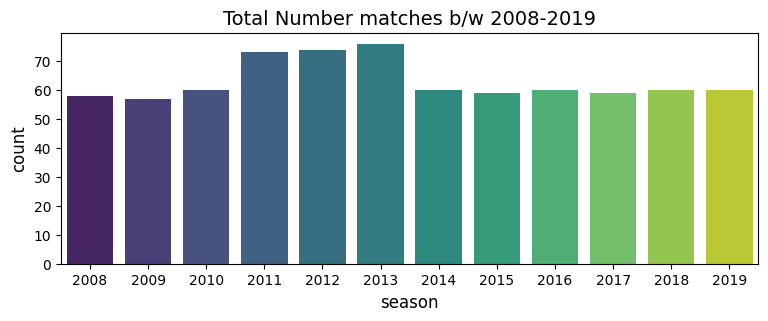

In [35]:
figure = plt.figure(figsize=[9, 3])
sns.countplot(x="season" ,data=df_matches )

plt.xlabel(xlabel='season', size=12)
plt.ylabel('Number of matches',size=12)

plt.title('Total Number matches b/w 2008-2019',size=14)

ax=sns.countplot(x="season",data=df_matches,palette='viridis')
                 
plt.show()

<b> Creating a list of the Top 20 Cities where the most number of matches have been played.


Top 20 Stadiums with the maximum number of Matches Played:
                               venue  Match Counts
18                           Mumbai           105
15                          Kolkata            77
7                             Delhi            74
1                         Bangalore            73
11                        Hyderabad            56
16  MA Chidambaram Stadium, Chepauk            49
13                           Jaipur            47
27                     South Africa            43
22                           Punjab            35
21                             Pune            22
20                      Navi Mumbai            17
4                        Chandigarh            14
8                             Dubai            14
29                    Visakhapatnam            13
0                         Ahmedabad            12
24                           Rajkot            10
12                           Indore             9
10                 Himachal Pradesh     

Text(0.5, 1.0, 'Top Stadiums that have hosted IPL Matches')

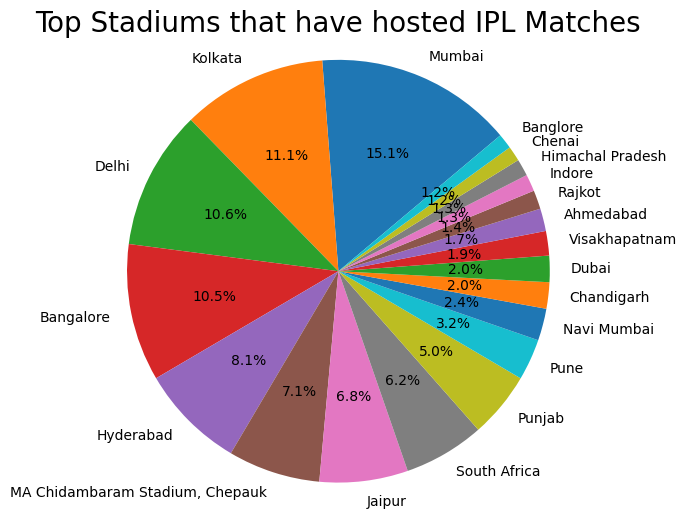

In [36]:
venue_counts=df_matches.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:20]
print('Top 20 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.figure(figsize=(6,6))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadiums that have hosted IPL Matches',size=20)


## Creating a list of Top winers that have won the IPL Matches.

Top 7 winner with the maximum number of Matches win:
                          winner  season
8                Mumbai Indians     109
0           Chennai Super Kings     100
7         Kolkata Knight Riders      92
13  Royal Challengers Bangalore      84
5               Kings XI Punjab      82
10             Rajasthan Royals      75
3              Delhi Daredevils      67


Text(0.5, 1.0, 'Top winers that have won IPL Matches')

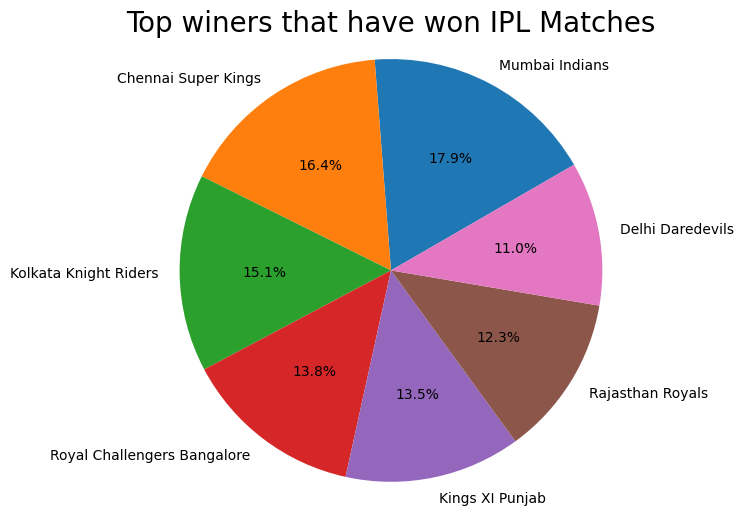

In [69]:

winner_counts=df_matches.groupby('winner').apply(lambda x:x['winner'].count()).reset_index(name='season')
top_winner_order=winner_counts.sort_values(by='season',ascending=False)
top_winner=top_winner_order[:7]
print('Top 7 winner with the maximum number of Matches win:\n',top_winner)
plt.figure(figsize=(6,6))

plt.pie(top_winner['season'],labels=top_winner['winner'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top winers that have won IPL Matches',size=20)


In [70]:
import plotly.express as px

## Creating the list of Top 10 Scoring Batsman.


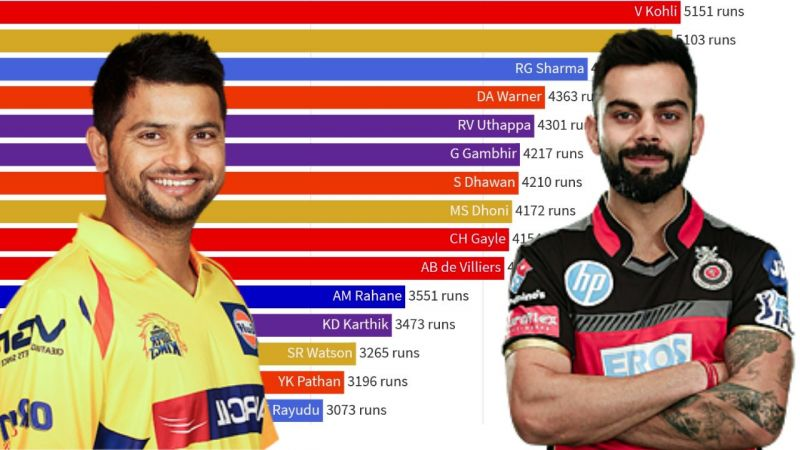

In [71]:
batting_tot=df_matches1.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')
fig.show()


The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
505         V Kohli  5878
438        SK Raina  5368
116       DA Warner  5254
379       RG Sharma  5230
407        S Dhawan  5197
24   AB de Villiers  4849
96         CH Gayle  4772
301        MS Dhoni  4632
398      RV Uthappa  4607
154       G Gambhir  4217


 ## Creating the list of the Top 10 highest scorers in a match.

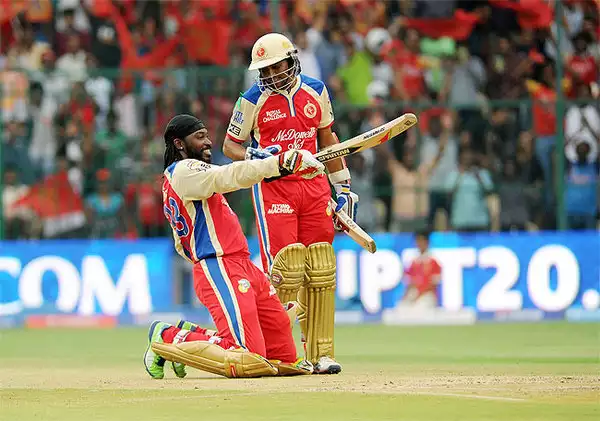

In [78]:

#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
batting_ings=df_matches1.groupby(['id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=df_matches1.groupby(['id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['id','batsman'],right_on=['id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,df_matches1,how='inner',left_on=['id','batsman'],right_on=['id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2.drop_duplicates())


The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69              253.62319       1   
1          CH Gayle           175           69              253.62319       1   
2          CH Gayle           175           69              253.62319       1   
3          CH Gayle           175           69              253.62319       1   
4          CH Gayle           175           69              253.62319       1   
5          CH Gayle           175           69              253.62319       1   
6          CH Gayle           175           69              253.62319       1   
7          CH Gayle           175           69              253.62319       1   
8          CH Gayle           175           69              253.62319       1   
9          CH Gayle           175           69              253.62319       1   
10         CH Gayle           175           69      

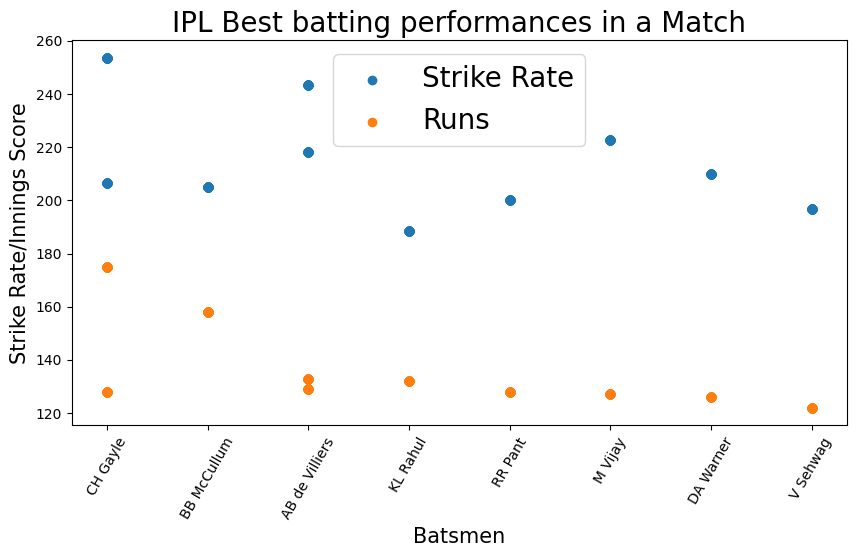

In [75]:


x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})



**Observation** : Chris Gayle and AB de Villiers have appeared twice in the Top 10 run scorer list. Both have represented RCB, when they have enlisted their Top 2 scores- which are in the Top 10 list of IPL History- making RCB achieve Top 4 spots out of 10, Followed by Chennai Super Kings with 2 spots. A very surprising observation lies in the fact that all the bowling teams against whom the top scores in a match is achieved are different- and comprises of 4 Teams who have been IPL champions (Out of 5).



## **** Creating a list of the top 10 Bowlers with highest number of wickets.****


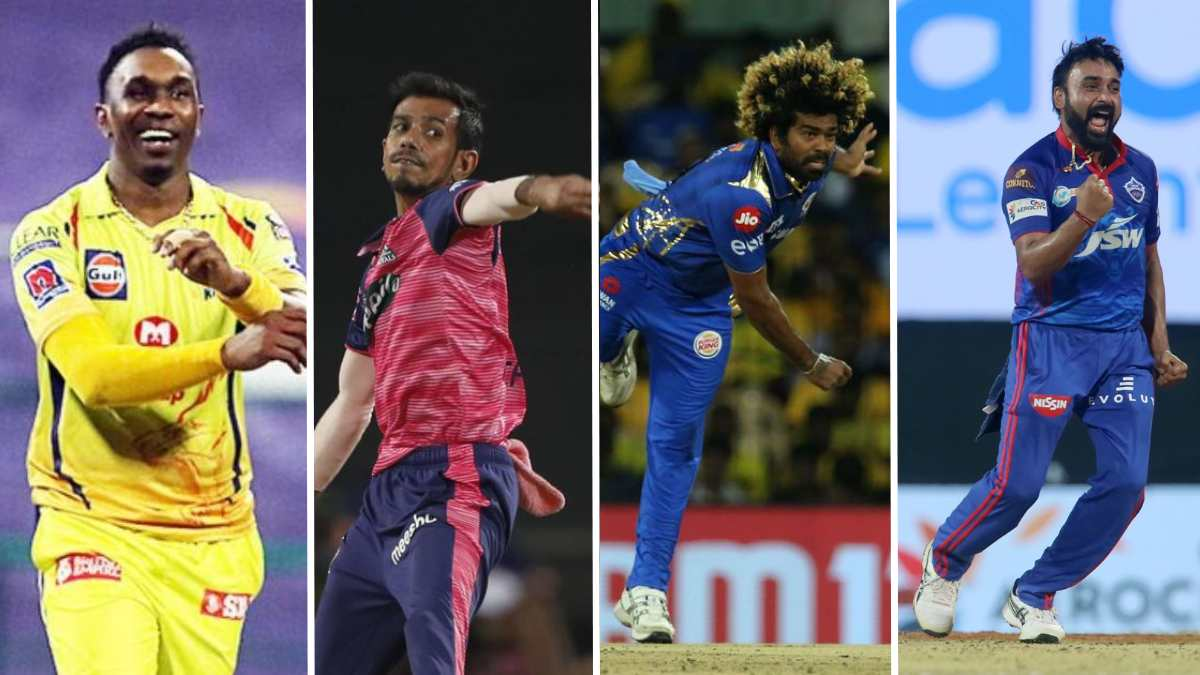

In [76]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
bowling_wickets=df_matches1[df_matches1['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
297       SL Malinga      170
5           A Mishra      160
235        PP Chawla      156
85          DJ Bravo      153
115  Harbhajan Singh      150
240         R Ashwin      138
50           B Kumar      136
304        SP Narine      127
357        YS Chahal      121
338         UT Yadav      119


## Creating a list of the Top 10 Wicket Takers in a match of IPL.


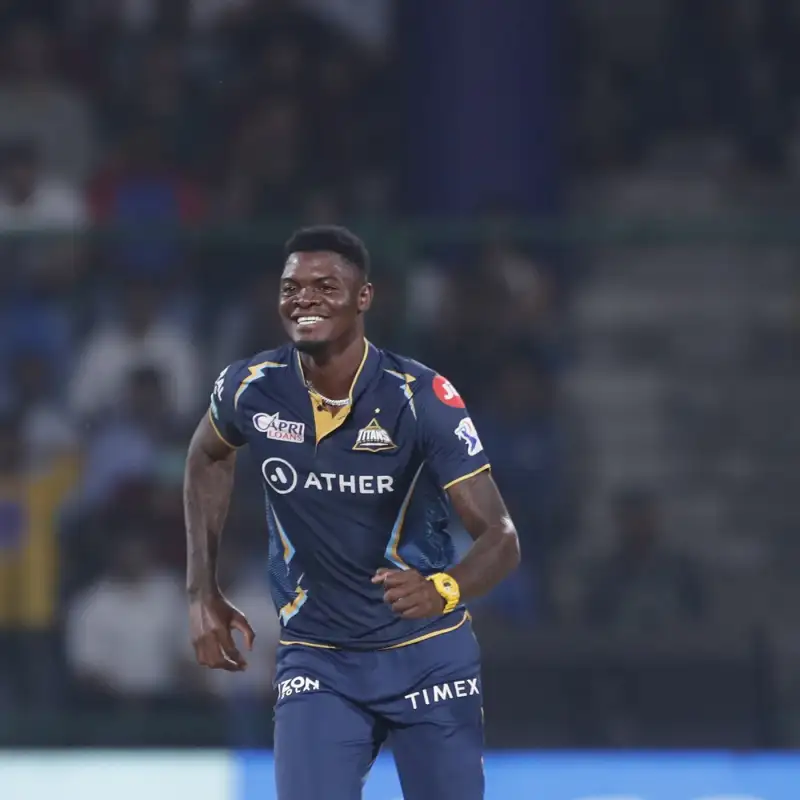

In [77]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
match_bowling_tot=bowling_wickets.groupby(['id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['id','bowler','Wickets']][0:10] 
match_bowling_runs=df_matches1.groupby(['id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,df_matches1,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',bowler_innings_req_2.drop_duplicates())


The Top 10 Batting Performances in the IPL History are:
               bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  over  \
0          AS Joseph        6              14          2.33333       2    15   
1          AS Joseph        6              14          2.33333       2    15   
2          AS Joseph        6              14          2.33333       2    15   
3          AS Joseph        6              14          2.33333       2    15   
4          AS Joseph        6              14          2.33333       2    15   
5          AS Joseph        6              14          2.33333       2    15   
6          AS Joseph        6              14          2.33333       2    15   
7          AS Joseph        6              14          2.33333       2    15   
8          AS Joseph        6              14          2.33333       2    17   
9          AS Joseph        6              14          2.33333       2    17   
10         AS Joseph        6              14          2.33333 

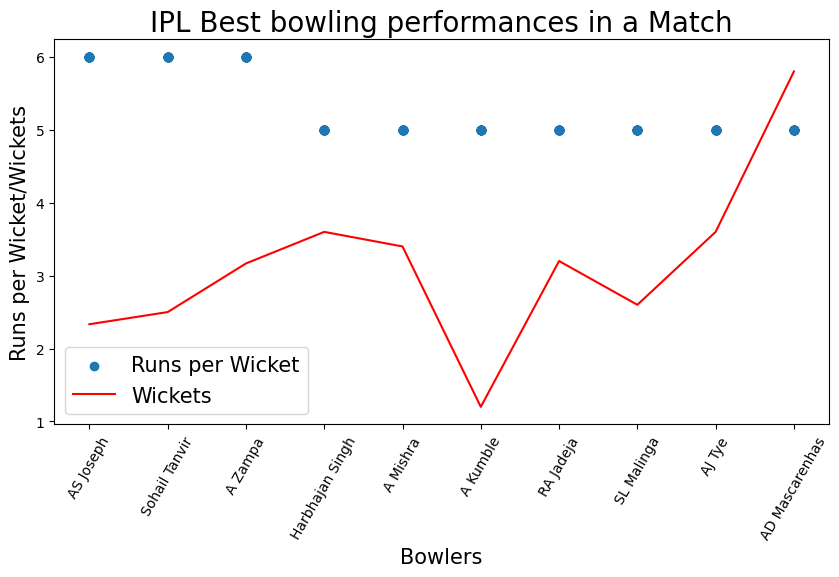

In [44]:
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.plot(x,y2,'r')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Runs per Wicket/Wickets',size=15)
plt.title('IPL Best bowling performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Runs per Wicket','Wickets'],prop={'size':15})


**Observation**: The Team whose players have taken most number of 5+ wickets in a match are Mumbai Indians. No wonder, they have been awarded the trophy most number of times, due to their outstanding performances. The Team against which the maximum number of 5 wickets have been recorder is Sunrisers Hyderabad. This is somewhat due to the lack of middle order batsmen in Sunrisers team in the recent years.



## *** Creating a list of the top 10 fielders (including Wicket Keepers).***


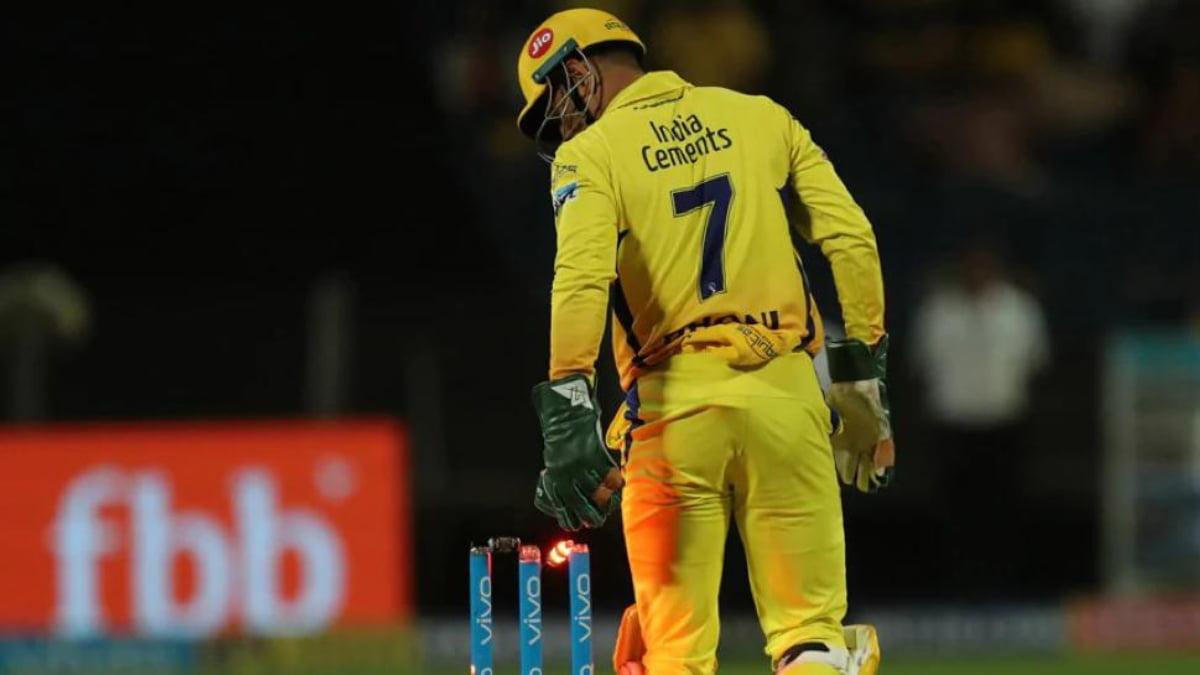

In [48]:
#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list=df_matches1.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

fig = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='Top 10 Fielders in IPL- Seasons 2008-2019')
fig.show()


The Best Fielders(and WicketKeepers) in the Torunament are:
                 fielder  Dismissals
11           KD Karthik           4
15             MS Dhoni           4
20             PA Patel           3
0          AC Gilchrist           2
23            SV Samson           2
25          YV Takawale           2
6   DW Steyn,MV Boucher           1
7          Ishan Kishan           1
24              WP Saha           1
2             AT Rayudu           1


**Observation**: Wicketkeepers have a better dismissal record. Out of the top 10, 4 have been regular keepers while 2 have been part-time keepers. One of the primary reason is stumpings are credited only to wicketkeepers. Although it is actually unfair to map the fielders and Wicket keeprs- but since in the data there is no distinction available based on the position of the players- and many Wicket Keepers have also played matches- as normal fielders, we go ahead with the given explanation



## ***Creating a list of the Players who have achieved highest number of 'Man of the Match Awards'.***


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'MS Dhoni'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'RG Sharma'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'MEK Hussey'),
  Text(10, 0, 'V Kohli'),
  Text(11, 0, 'AM Rahane'),
  Text(12, 0, 'AD Russell'),
  Text(13, 0, 'DR Smith'),
  Text(14, 0, 'V Sehwag')])

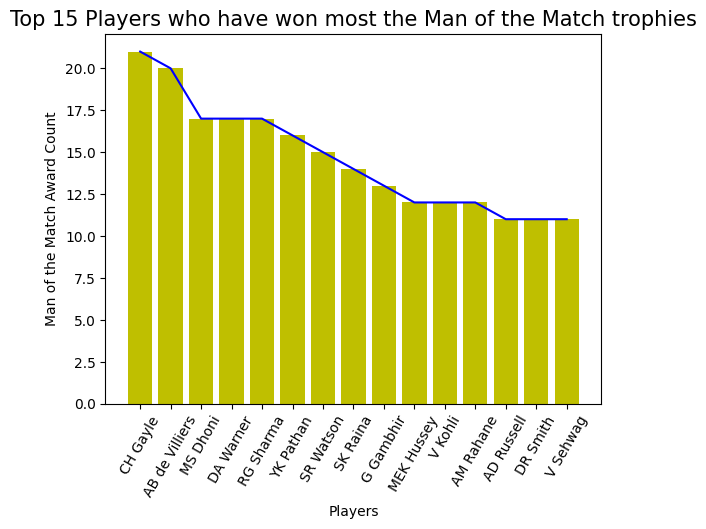

In [45]:
motm=df_matches.groupby('player_of_match').apply(lambda x:x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
motm_sort=motm.sort_values(by='Man of the Match Awards',ascending=False)
motm_top=motm_sort[0:15]
plt.plot(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='b')
plt.bar(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='y')
plt.xlabel('Players')
plt.ylabel('Man of the Match Award Count')
plt.title('Top 15 Players who have won most the Man of the Match trophies',size=15)
plt.xticks(rotation=60)


**Observation**: Most of the 'Match of the Man' award winners have been Batsmen and All rounders. Bowlers are not present in the Top 15 list. This is clearly indicative of the bias against the bowlers in the Tournament. Let me quote an icident in this regard. In the 2009 Season, Anil Kumble had achieved a 5 Wicket haul, with an economy rate of 1.57 in a match for Royal Challengers bangalore- which is still one of the best performnaces in the history of IPL. But he was not awarded a 'man of the Match' award for that Match. It went to Rahul Dravid for scoring a 48*.



## ***The Toss Decisions taken by Venue Heatmap-in IPL.***


Text(0.5, 1.0, 'The Toss Decisions taken by Venue Heatmap-in IPL')

<Figure size 640x480 with 0 Axes>

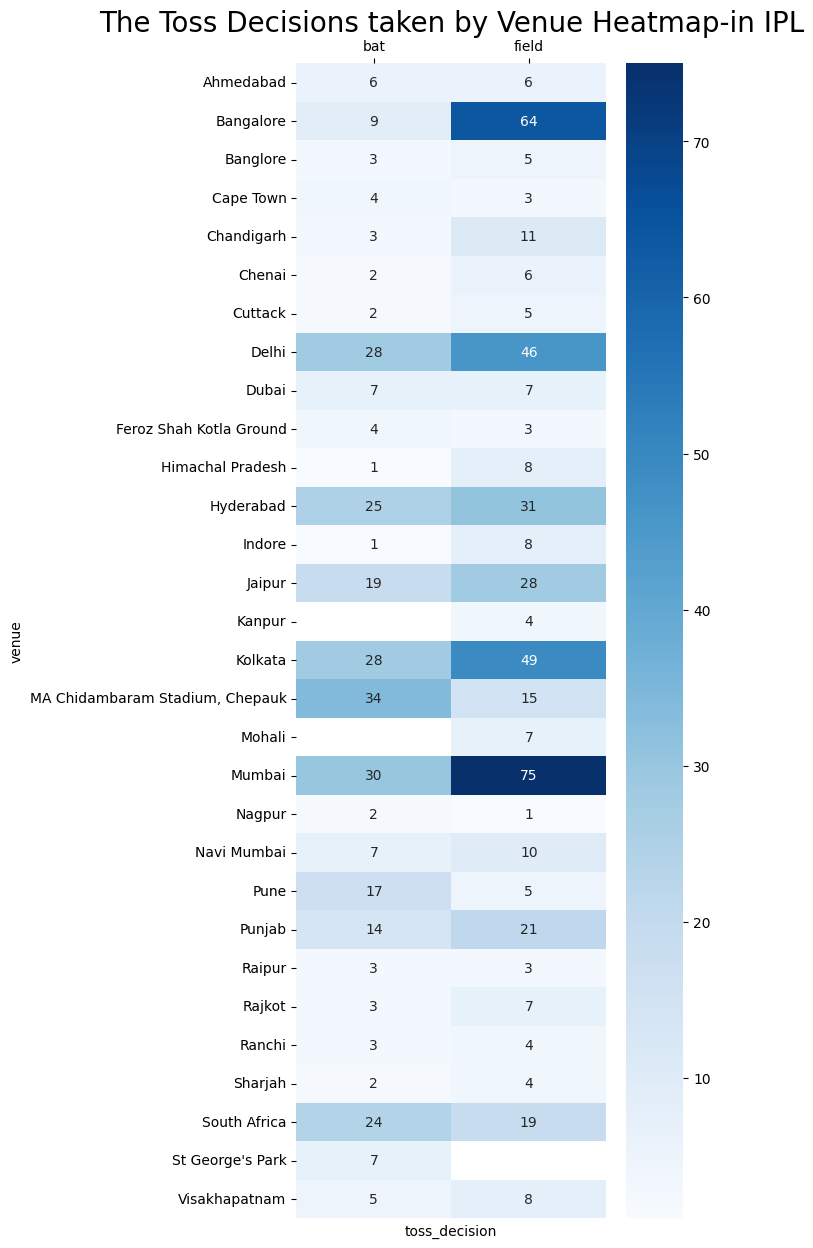

In [46]:
venue_toss=df_matches.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')
heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts', 
                     index=['venue'], 
                     columns='toss_decision')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap2_data,annot=True, cmap="Blues",fmt='g')
g.xaxis.set_ticks_position("top")
ax.set_title('The Toss Decisions taken by Venue Heatmap-in IPL',size=20)


**Observation**: The blue and green highlights are expected for the particular teams at the venues- For e.g. Chennai Super Kings at M.A. Chidambaram, Kolkata Knight Riders at Eden Gardens and Mumbai Indians at Wankhede Stadium-since the Venues being located at their home stadium, they have played more number of matches in that place. And since, more the number of games being played, more will obviously be the chances of winnings at the particular venue. But ignoring those, ie, when considering a teams capability to perform in the away matches, we see Mumbai Indians and Chennai Super Kings have shown very good performances in different venues, and that too multiple times. Undoubtedly, they have been the most succesful teams in the history of the tournament.



## ***Team wise winning Performance at Venues.***


Text(0.5, 1.0, 'Team wise wins at the Venues')

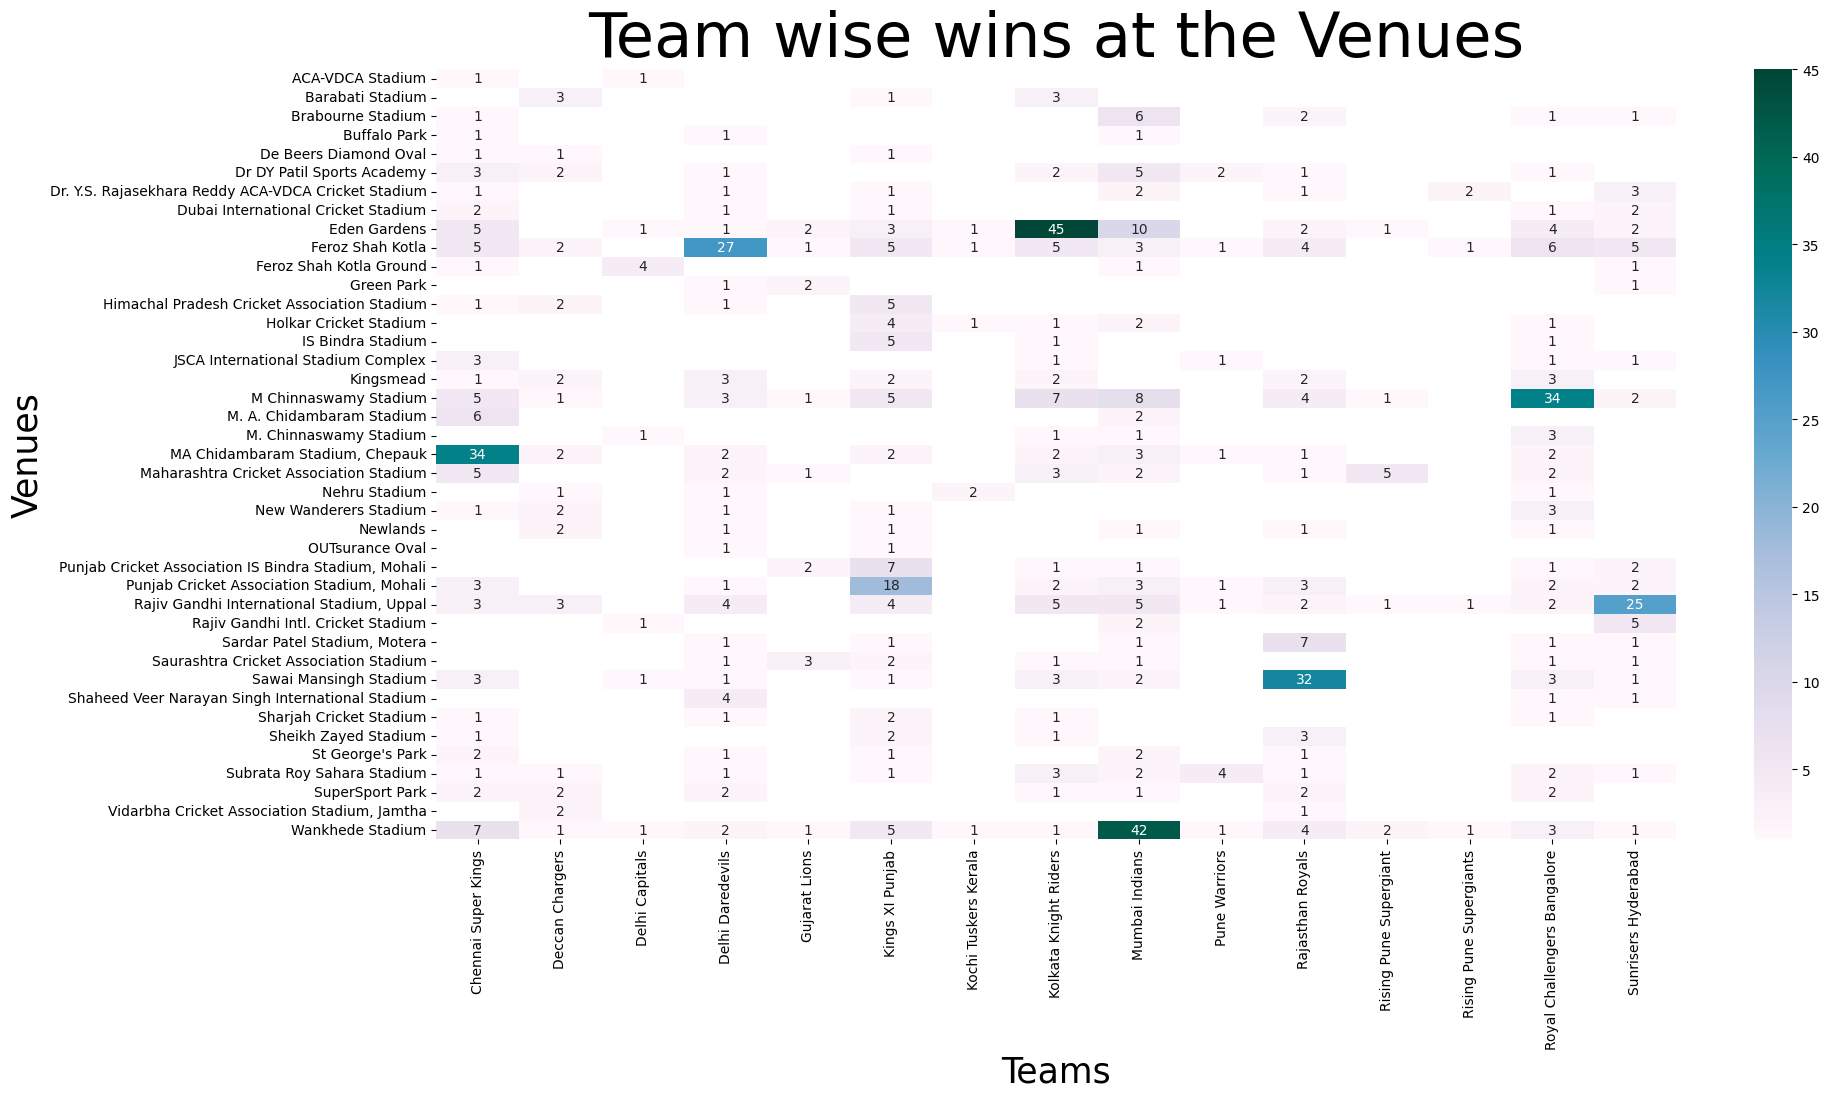

In [79]:
venue_win=df_matches.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Match Wins')
venue_win_pvt=pd.pivot(venue_win,values='Match Wins',index='venue',columns='winner')
venue_win_pvt.replace(np.NaN,0)
plt.figure(figsize=(20,10))
htmp=sns.heatmap(venue_win_pvt,annot=True,fmt='g',cmap='PuBuGn')
plt.xlabel('Teams',size=25)
plt.ylabel('Venues',size=25)
plt.title('Team wise wins at the Venues',size=45)


## Summary.

## Conclusion


   **We have now come to the point where we summarize out findings. We shall be providing them in the below points:**<br>
1.Multiple players who could have been a good potential to the world of Cricket- have got very less appearence opportunities, or have been dropped due to a few inconsistent performances. We often come across news of players in the Indian Premier League, who have left the game of cricket and resorted to means to support their families.<br>
2.Since Each Team gets an opportunity to Play atleast 7 matches in their Home Ground, most teams have also won the highest number of their wins in their Home Grounds. But Teams like Mumbai Indians and Chennai Super Kings have performed really well at away grounds too. This constitutes one of the major reasons, as to why these teams have been the most succesful in the IPL History.<br>
3.The Batting and Bowling Averages of most of teams are better in the First innings-as compared to the second innings.



The data was very rich- Ball by Ball data and match data has been provided across 12 seasons- which is actually a very difficult task to manage. ***Thanks a lot for the data!***


# Thank You !!